# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

C:\Users\nien\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_lab_train),(x_img_test,y_lab_test) = cifar100.load_data(label_mode = 'fine')
print(x_img_train.shape)
print(y_lab_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [30]:
label_dict = {}

for i in range(0,101,1):
    label_dict[str(i)] = i

In [32]:
y_lab_train[0][0]

19

In [33]:
label_dict[str(y_lab_train[0][0])]

19

In [34]:
import matplotlib.pyplot as plt

def plot_image_label_prediction(image,labels,prediction,idx,num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(image[idx],cmap = 'binary')
        
        title = label_dict[str(labels[i][0])]
        ax.set_title(title,fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

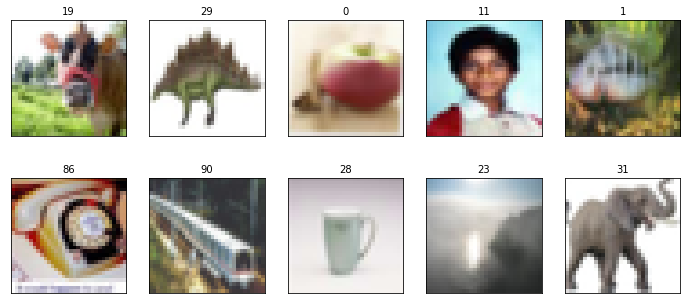

In [35]:
plot_image_label_prediction(x_img_train,y_lab_train,[],0)

# Image normalize 

In [11]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [12]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [13]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [14]:
y_lab_train.shape

(50000, 1)

In [15]:
y_lab_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [16]:
from keras.utils import np_utils
y_lab_train_onehot = np_utils.to_categorical(y_lab_train)
y_lab_test_onehot = np_utils.to_categorical(y_lab_test)

In [17]:
y_lab_train_onehot.shape

(50000, 100)

In [19]:
y_lab_train_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.